# Importing modules

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Download Dataset from kaggle

In [ ]:
!kaggle datasets download -d srijonashraf/maize-leaf-diseases-six-classes

Dataset URL: https://www.kaggle.com/datasets/srijonashraf/maize-leaf-diseases-six-classes
License(s): unknown
 85% 89.0M/104M [00:00<00:00, 156MB/s]
100% 104M/104M [00:00<00:00, 154MB/s] 


In [ ]:
!unzip maize-leaf-diseases-six-classes.zip && rm maize-leaf-diseases-six-classes.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Corn___Common_Rust/image (942).JPG  
  inflating: train/Corn___Common_Rust/image (943).JPG  
  inflating: train/Corn___Common_Rust/image (944).JPG  
  inflating: train/Corn___Common_Rust/image (945).JPG  
  inflating: train/Corn___Common_Rust/image (947).JPG  
  inflating: train/Corn___Common_Rust/image (948).JPG  
  inflating: train/Corn___Common_Rust/image (949).JPG  
  inflating: train/Corn___Common_Rust/image (95).JPG  
  inflating: train/Corn___Common_Rust/image (950).JPG  
  inflating: train/Corn___Common_Rust/image (952).JPG  
  inflating: train/Corn___Common_Rust/image (954).JPG  
  inflating: train/Corn___Common_Rust/image (955).JPG  
  inflating: train/Corn___Common_Rust/image (956).JPG  
  inflating: train/Corn___Common_Rust/image (958).JPG  
  inflating: train/Corn___Common_Rust/image (959).JPG  
  inflating: train/Corn___Common_Rust/image (960).JPG  
  inflating: train/Corn___Common_Rust/image (962).JPG 

# Data Preprocessing

## Training images

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 5940 files belonging to 6 classes.


## Test images

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 660 files belonging to 6 classes.


# Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

## Add convolution Layers

In [ ]:
cnn.add(tf.keras.layers.Input(shape=[128,128,3]))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1024,activation='relu'))

In [ ]:
# To avoid overfitting
cnn.add(tf.keras.layers.Dropout(0.4))

In [ ]:
# Output Layer
cnn.add(tf.keras.layers.Dense(units=6,activation='softmax'))

# Compiling

In [ ]:
# compiling
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

## Training

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=test_set,epochs=10, batch_size=None)

Epoch 1/10
186/186 [==============================] - 74s 389ms/step - loss: 0.7789 - accuracy: 0.7081 - val_loss: 0.5140 - val_accuracy: 0.8091
Epoch 2/10
186/186 [==============================] - 71s 383ms/step - loss: 0.3304 - accuracy: 0.8705 - val_loss: 0.3259 - val_accuracy: 0.8909
Epoch 3/10
186/186 [==============================] - 72s 386ms/step - loss: 0.2361 - accuracy: 0.9111 - val_loss: 0.2501 - val_accuracy: 0.9197
Epoch 4/10
186/186 [==============================] - 72s 389ms/step - loss: 0.1820 - accuracy: 0.9320 - val_loss: 0.2207 - val_accuracy: 0.9167
Epoch 5/10
186/186 [==============================] - 71s 384ms/step - loss: 0.1577 - accuracy: 0.9419 - val_loss: 0.2065 - val_accuracy: 0.9333
Epoch 6/10
186/186 [==============================] - 72s 385ms/step - loss: 0.1403 - accuracy: 0.9465 - val_loss: 0.2316 - val_accuracy: 0.9288
Epoch 7/10
186/186 [==============================] - 71s 381ms/step - loss: 0.1184 - accuracy: 0.9569 - val_loss: 0.1951 - val_ac

# Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

186/186 [==============================] - 11s 57ms/step - loss: 0.0412 - accuracy: 0.9867
Training accuracy: 0.9867003560066223


In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(test_set)
print('Validation accuracy:', val_acc)

21/21 [==============================] - 1s 55ms/step - loss: 0.1755 - accuracy: 0.9379
Validation accuracy: 0.9378787875175476


In [ ]:
cnn.save('model_new.keras', save_format='keras')

In [ ]:
training_history.history #Return Dictionary of history

{'loss': [0.7789343595504761,
  0.33043473958969116,
  0.23606392741203308,
  0.18195609748363495,
  0.157747283577919,
  0.14033228158950806,
  0.1183907687664032,
  0.09516748785972595,
  0.07862518727779388,
  0.06300487369298935],
 'accuracy': [0.7080808281898499,
  0.8705387115478516,
  0.9111111164093018,
  0.9319865107536316,
  0.941919207572937,
  0.9464646577835083,
  0.9569023847579956,
  0.9646464586257935,
  0.9678451418876648,
  0.9759259223937988],
 'val_loss': [0.5140236020088196,
  0.32590681314468384,
  0.2501010000705719,
  0.22066694498062134,
  0.20654717087745667,
  0.2316041886806488,
  0.19507141411304474,
  0.19692163169384003,
  0.17505644261837006,
  0.17554913461208344],
 'val_accuracy': [0.8090909123420715,
  0.8909090757369995,
  0.9196969866752625,
  0.9166666865348816,
  0.9333333373069763,
  0.928787887096405,
  0.9409090876579285,
  0.9333333373069763,
  0.9439393877983093,
  0.9378787875175476]}

In [ ]:
#Recording History in json
import json
with open('training_history.json','w') as f:
  json.dump(training_history.history, f, indent=4)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Metrics Visualization

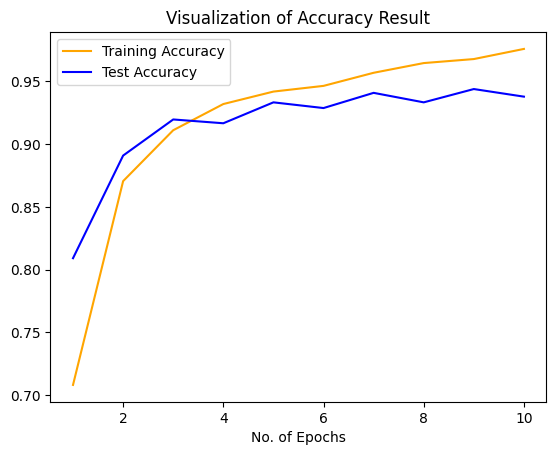

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='orange',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Test Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
class_names = test_set.class_names
class_names

['Corn___Common_Rust',
 'Corn___Gray_Leaf_Spot',
 'Corn___Healthy',
 'Corn___Northern_Leaf_Blight',
 'Corn___Northern_Leaf_Spot',
 'Corn___Phaeosphaeria_Leaf_Spot']

In [ ]:
valid_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 300 files belonging to 6 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/MaizeDiseaseDetection/valid" /content/

In [ ]:
y_pred = cnn.predict(valid_set)
predicted_categories = tf.argmax(y_pred, axis=1)

300/300 [==============================] - 4s 13ms/step


In [ ]:
true_categories = tf.concat([y for x, y in valid_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:
Y_true


<tf.Tensor: shape=(300,), dtype=int64, numpy=
array([3, 3, 3, 5, 2, 3, 1, 2, 1, 2, 4, 5, 3, 0, 2, 1, 2, 4, 5, 3, 0, 5,
       5, 4, 0, 2, 0, 5, 3, 1, 0, 2, 1, 4, 5, 1, 4, 5, 0, 1, 2, 3, 3, 5,
       2, 4, 3, 4, 5, 5, 2, 1, 4, 3, 0, 5, 5, 1, 4, 2, 4, 0, 0, 0, 4, 1,
       5, 2, 0, 3, 2, 5, 2, 1, 0, 5, 2, 1, 3, 3, 0, 3, 3, 4, 5, 1, 4, 3,
       4, 5, 4, 3, 4, 2, 2, 4, 4, 0, 1, 5, 5, 0, 0, 0, 3, 1, 2, 4, 2, 2,
       5, 2, 3, 2, 3, 2, 0, 3, 0, 0, 4, 2, 0, 5, 5, 5, 4, 1, 5, 3, 0, 5,
       1, 2, 0, 1, 1, 2, 3, 5, 3, 4, 1, 1, 3, 2, 1, 5, 5, 1, 4, 2, 4, 5,
       5, 2, 4, 0, 2, 5, 2, 3, 5, 0, 0, 2, 2, 0, 5, 1, 5, 1, 2, 0, 4, 2,
       3, 2, 3, 0, 0, 2, 4, 1, 3, 3, 3, 1, 4, 4, 5, 1, 1, 0, 1, 1, 0, 3,
       5, 2, 0, 5, 4, 4, 0, 1, 0, 3, 0, 2, 5, 0, 5, 3, 4, 5, 3, 1, 2, 1,
       0, 4, 0, 4, 4, 0, 2, 2, 1, 0, 3, 3, 1, 5, 0, 0, 1, 1, 1, 5, 4, 3,
       4, 3, 2, 4, 5, 3, 3, 2, 4, 1, 3, 1, 4, 5, 1, 2, 5, 1, 2, 4, 4, 4,
       1, 3, 4, 0, 1, 5, 4, 5, 3, 5, 2, 0, 1, 3, 2, 3, 4, 3, 4, 3, 4, 1,
     

In [ ]:
predicted_categories

<tf.Tensor: shape=(300,), dtype=int64, numpy=
array([5, 5, 3, 3, 3, 3, 2, 3, 4, 0, 2, 5, 2, 1, 1, 4, 5, 3, 5, 3, 3, 3,
       3, 3, 0, 2, 0, 3, 2, 2, 2, 4, 4, 5, 4, 5, 0, 0, 3, 3, 2, 4, 5, 5,
       4, 5, 2, 2, 5, 4, 3, 5, 0, 4, 3, 5, 2, 3, 3, 0, 0, 3, 5, 0, 0, 3,
       2, 2, 3, 5, 4, 2, 3, 0, 5, 4, 3, 0, 3, 0, 3, 4, 5, 4, 3, 5, 4, 3,
       5, 5, 2, 2, 3, 4, 3, 5, 0, 4, 0, 4, 3, 0, 0, 3, 3, 0, 2, 3, 0, 2,
       0, 2, 5, 0, 0, 3, 2, 2, 2, 0, 3, 2, 4, 4, 3, 3, 1, 2, 3, 3, 5, 5,
       4, 5, 0, 0, 0, 3, 3, 5, 2, 2, 5, 2, 3, 3, 2, 1, 4, 2, 4, 5, 2, 3,
       5, 3, 2, 4, 2, 1, 5, 0, 3, 5, 0, 2, 0, 5, 2, 2, 5, 5, 4, 2, 3, 0,
       4, 2, 3, 3, 0, 4, 3, 3, 0, 2, 5, 3, 3, 3, 1, 2, 0, 3, 3, 3, 4, 3,
       3, 4, 3, 0, 3, 0, 5, 0, 0, 4, 0, 4, 3, 2, 5, 1, 2, 4, 5, 0, 3, 0,
       4, 3, 5, 3, 0, 4, 2, 0, 3, 0, 3, 4, 3, 2, 5, 0, 3, 2, 4, 4, 3, 4,
       5, 3, 3, 3, 3, 4, 3, 3, 3, 5, 3, 4, 4, 5, 2, 5, 3, 4, 5, 3, 2, 2,
       3, 3, 4, 3, 3, 2, 4, 5, 5, 4, 3, 2, 0, 3, 3, 4, 0, 0, 5, 4, 0, 1,
     

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

NameError: name 'Y_true' is not defined

In [ ]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_names))

                                precision    recall  f1-score   support

            Corn___Common_Rust       0.25      0.26      0.26        50
         Corn___Gray_Leaf_Spot       0.12      0.02      0.03        50
                Corn___Healthy       0.22      0.22      0.22        50
   Corn___Northern_Leaf_Blight       0.19      0.36      0.25        50
     Corn___Northern_Leaf_Spot       0.12      0.12      0.12        50
Corn___Phaeosphaeria_Leaf_Spot       0.27      0.26      0.26        50

                      accuracy                           0.21       300
                     macro avg       0.20      0.21      0.19       300
                  weighted avg       0.20      0.21      0.19       300



# Confusion Matrix Visualization

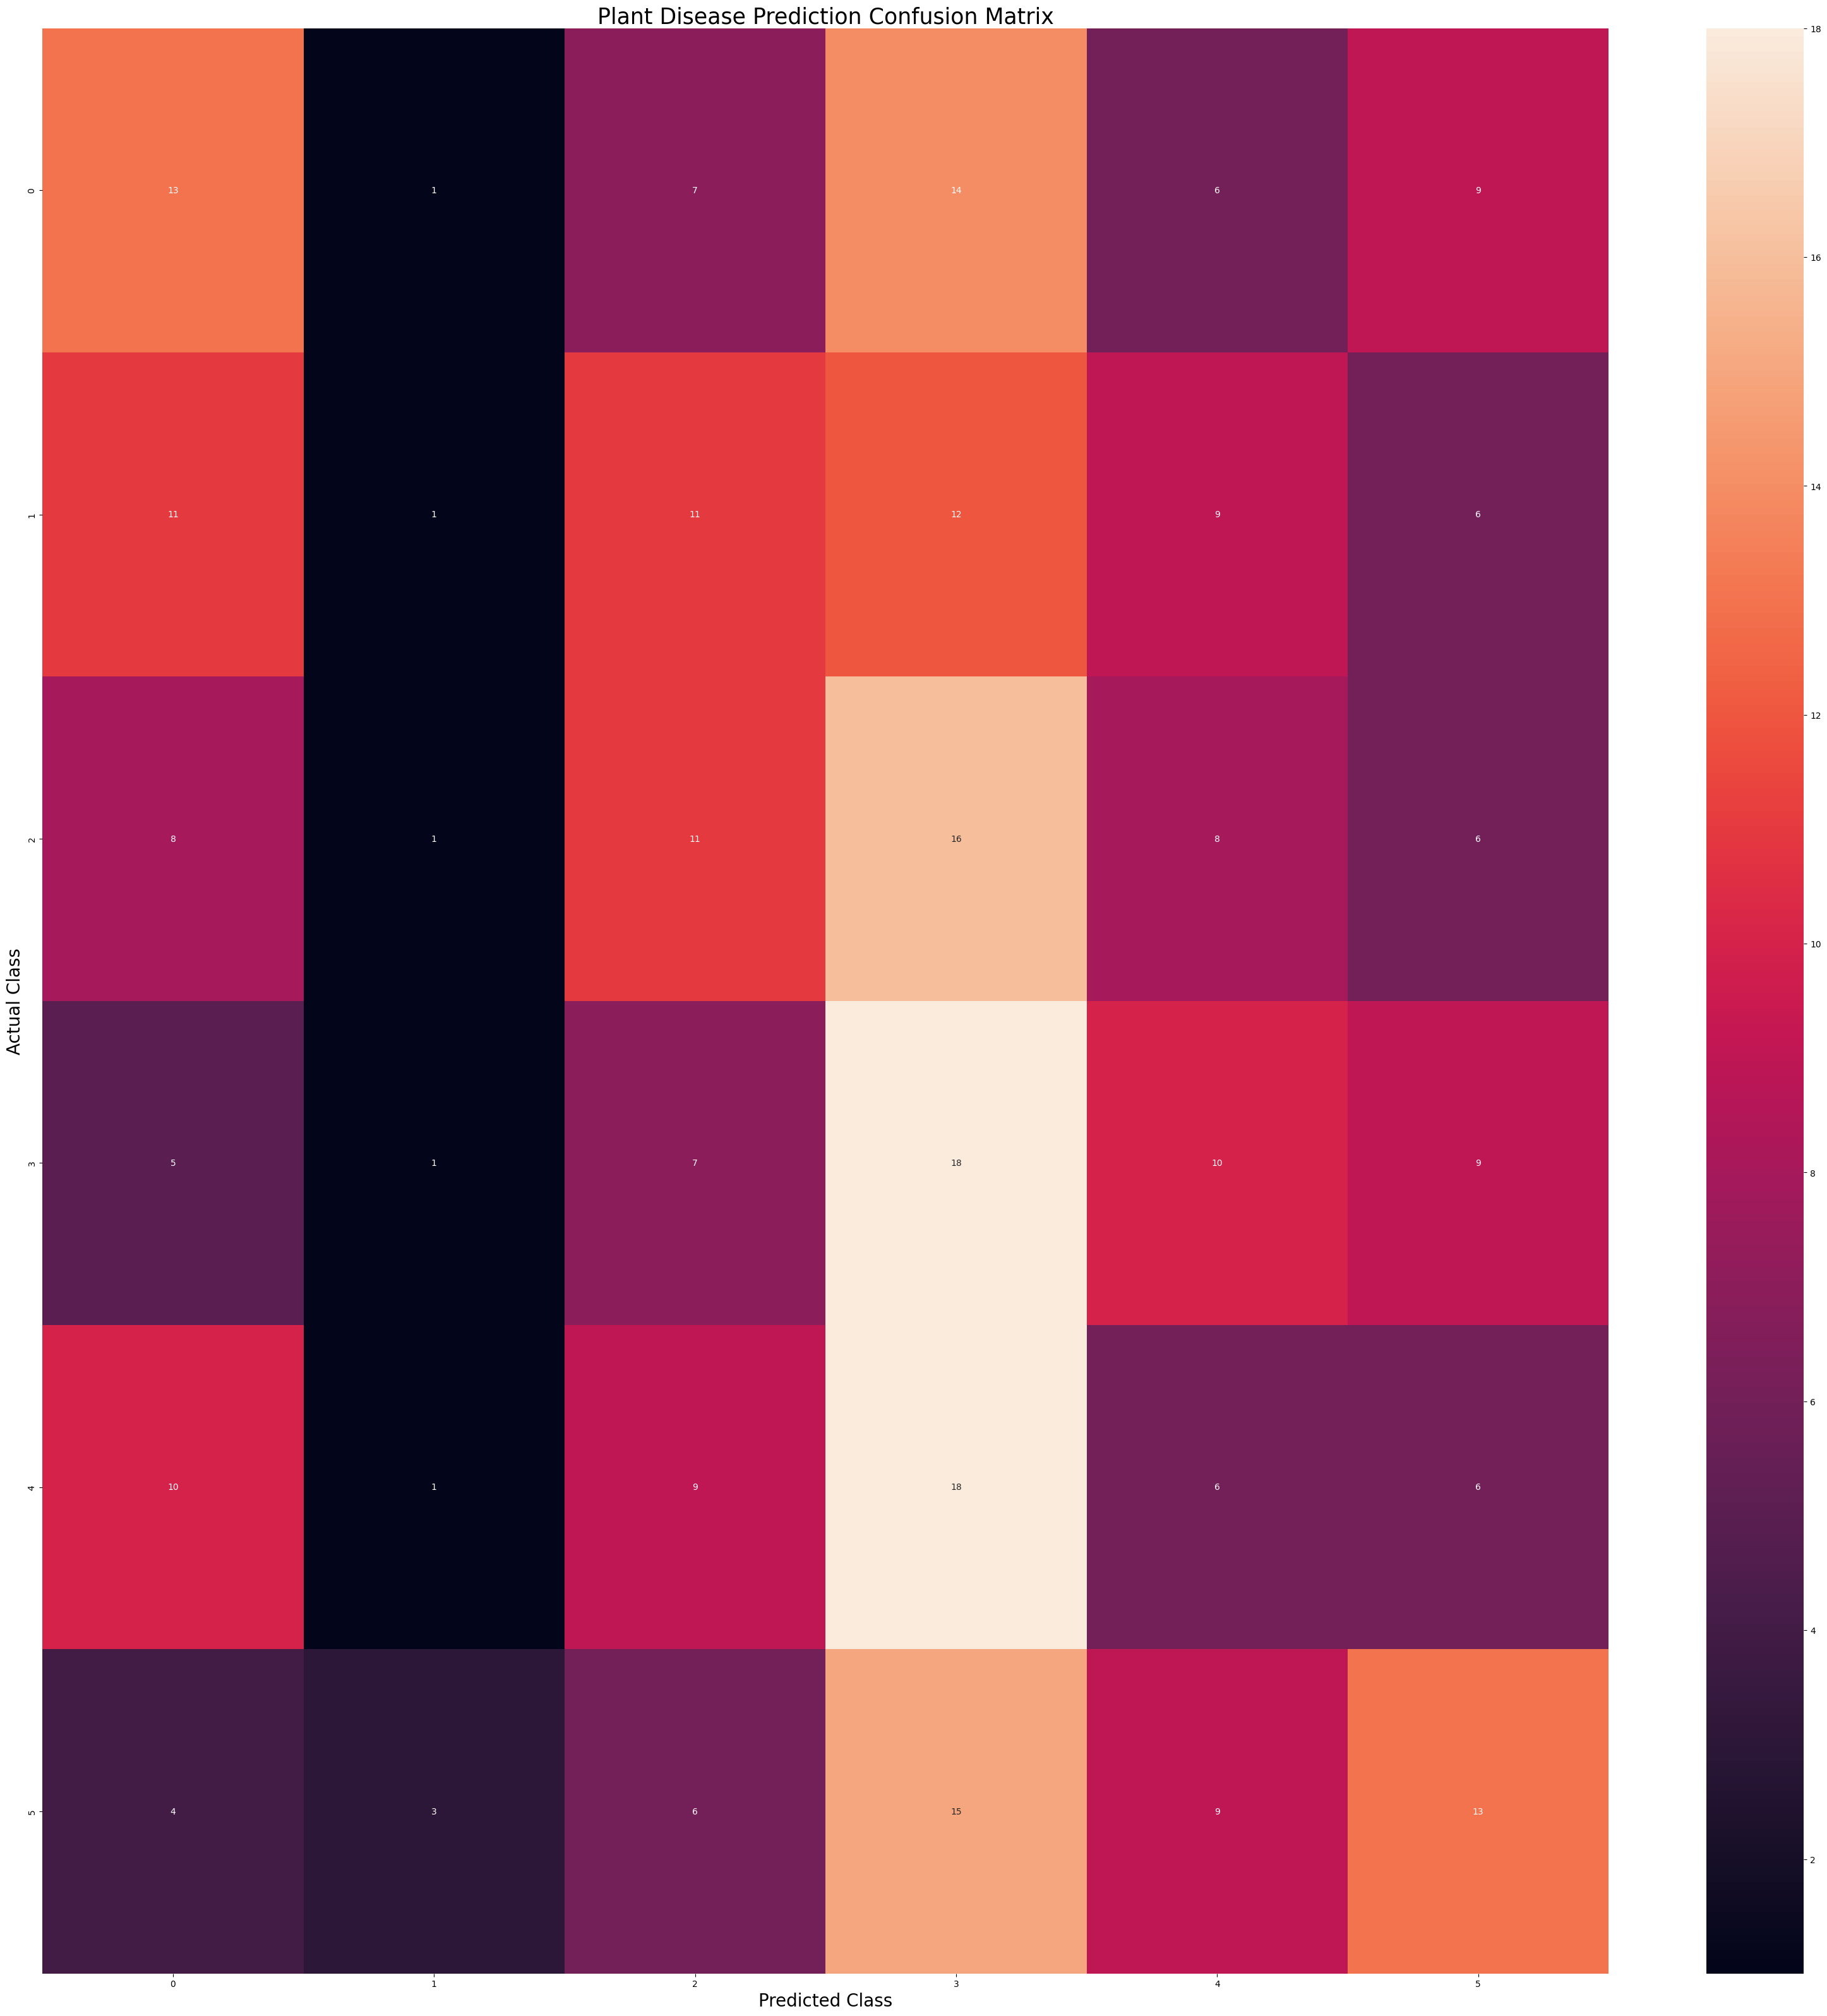

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()